# Time series values for Rjúpnasalir pumpstation

In [19]:
import matplotlib.pyplot as plt
import pandas as pd

In [20]:
df_pressure = pd.read_excel("data/H-KOP-RS-ÞS212.xlsx")
df_pressure.drop(columns=["mpoint_id","mpoint_name","aggregate_name","aggregate_id","flag","quality_description","event_time"],inplace=True)
df_pressure.head()



,start_time,value
0,2022-03-13 09:00:00,7.8
1,2022-03-14 23:00:00,7.8
2,2022-03-13 16:00:00,7.8
3,2022-03-08 02:00:00,7.8
4,2022-03-08 03:00:00,7.8


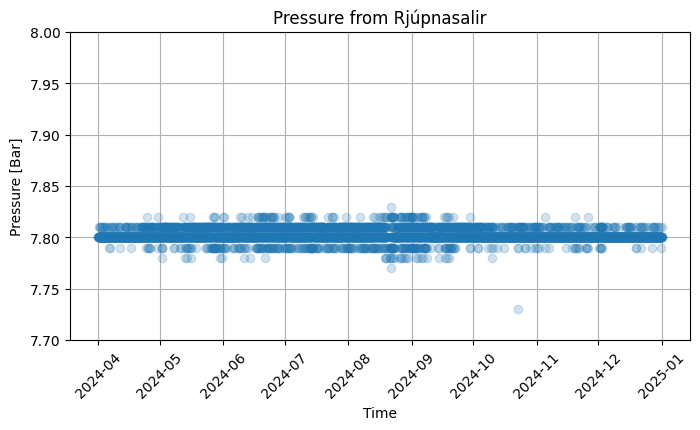

In [21]:
# Convert 'start_time' to datetime format
df_pressure['start_time'] = pd.to_datetime(df_pressure['start_time'], errors='coerce')

# Filter for July 2024
df_filtered = df_pressure[(df_pressure['start_time'].dt.year == 2024) & (df_pressure['start_time'].dt.month > 3)]

# Plot the values with more opacity and no line between them
plt.figure(figsize=(8, 4))
plt.plot(df_filtered['start_time'], df_filtered['value'], marker='o', linestyle='', alpha=0.2)  # Alpha controls opacity
plt.xlabel('Time')
plt.ylabel('Pressure [Bar]')
plt.title('Pressure from Rjúpnasalir')  # Update the title for July
plt.grid(True)
plt.xticks(rotation=45)
plt.ylim([7.7, 8])  # Set y-range from 0 to 100 (adjust as needed)


plt.show()


In [22]:
df_flow = pd.read_excel("data/H-KOP-RS-RS212.xlsx")
df_flow.drop(columns=["mpoint_id","mpoint_name","aggregate_name","aggregate_id","flag","quality_description","event_time"],inplace=True)
df_flow.head()

,start_time,value
0,2022-03-13 09:00:00,68.39
1,2022-03-14 23:00:00,64.47
2,2022-03-13 16:00:00,64.36
3,2022-03-08 02:00:00,63.76
4,2022-03-08 03:00:00,62.39


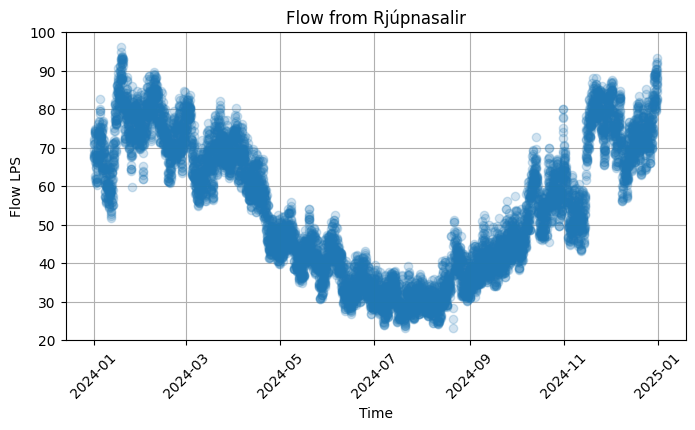

In [23]:
# Convert 'start_time' to datetime format
df_flow['start_time'] = pd.to_datetime(df_flow['start_time'], errors='coerce')

# Filter for July 2024
df_filtered_flow = df_flow[(df_flow['start_time'].dt.year == 2024)]

# Plot the values with more opacity and no line between them
plt.figure(figsize=(8, 4))
plt.plot(df_filtered_flow['start_time'], df_filtered_flow['value'], marker='o', linestyle='', alpha=0.2)  # Alpha controls opacity
plt.xlabel('Time')
plt.ylabel('Flow LPS')
plt.title('Flow from Rjúpnasalir')  # Update the title for July
plt.grid(True)
plt.xticks(rotation=45)
plt.ylim([20, 100])  # Set y-range from 0 to 100 (adjust as needed)


plt.show()


In [24]:
average_flow = df_filtered_flow['value'].mean()

# Print the average
print(f"The average flow is: {average_flow:.2f} m3/h")

The average flow is: 54.29 m3/h


/var/folders/mg/pzsnhp7x6vsfphvx57vfh73c0000gn/T/ipykernel_79003/3055383480.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered_flow['date'] = df_filtered_flow['start_time'].dt.date


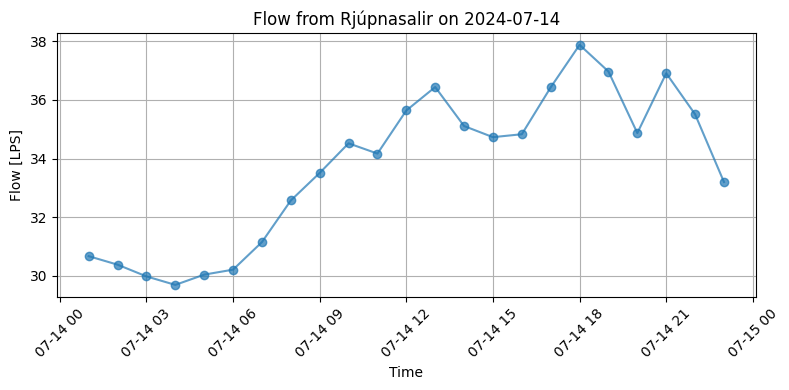


Relative Flow for 2024-07-14 (value / daily average ≈ 33.71 LPS):
01:00 — Flow: 30.67 LPS, Relative: 0.910
02:00 — Flow: 30.38 LPS, Relative: 0.901
03:00 — Flow: 29.98 LPS, Relative: 0.889
04:00 — Flow: 29.69 LPS, Relative: 0.881
05:00 — Flow: 30.04 LPS, Relative: 0.891
06:00 — Flow: 30.21 LPS, Relative: 0.896
07:00 — Flow: 31.15 LPS, Relative: 0.924
08:00 — Flow: 32.57 LPS, Relative: 0.966
09:00 — Flow: 33.51 LPS, Relative: 0.994
10:00 — Flow: 34.52 LPS, Relative: 1.024
11:00 — Flow: 34.17 LPS, Relative: 1.014
12:00 — Flow: 35.64 LPS, Relative: 1.057
13:00 — Flow: 36.44 LPS, Relative: 1.081
14:00 — Flow: 35.11 LPS, Relative: 1.041
15:00 — Flow: 34.73 LPS, Relative: 1.030
16:00 — Flow: 34.83 LPS, Relative: 1.033
17:00 — Flow: 36.43 LPS, Relative: 1.081
18:00 — Flow: 37.88 LPS, Relative: 1.124
19:00 — Flow: 36.97 LPS, Relative: 1.097
20:00 — Flow: 34.87 LPS, Relative: 1.034
21:00 — Flow: 36.91 LPS, Relative: 1.095
22:00 — Flow: 35.51 LPS, Relative: 1.053
23:00 — Flow: 33.20 LPS, Relati

In [35]:
import matplotlib.pyplot as plt
import pandas as pd

# --- Convert to datetime format ---
df_flow['start_time'] = pd.to_datetime(df_flow['start_time'], errors='coerce')

# --- Filter for 2024 ---
df_filtered_flow = df_flow[df_flow['start_time'].dt.year == 2024]

# --- Extract date column ---
df_filtered_flow['date'] = df_filtered_flow['start_time'].dt.date

# --- Choose an arbitrary date ---
chosen_date = pd.to_datetime("2024-07-14").date()
day_data = df_filtered_flow[df_filtered_flow['date'] == chosen_date]

# --- Sort by time ---
day_data = day_data.sort_values(by='start_time')

# --- Compute daily average flow ---
daily_avg = day_data['value'].mean()

# --- Plot ---
plt.figure(figsize=(8, 4))
plt.plot(day_data['start_time'], day_data['value'], marker='o', linestyle='-', alpha=0.7)
plt.xlabel('Time')
plt.ylabel('Flow [LPS]')
plt.title(f'Flow from Rjúpnasalir on {chosen_date}')
plt.grid(True)
plt.xticks(rotation=45)
# plt.ylim([20, 100])  # Adjust based on data range
plt.tight_layout()
plt.show()

# --- Print relative flow values ---
print(f"\nRelative Flow for {chosen_date} (value / daily average ≈ {daily_avg:.2f} LPS):")
for t, v in zip(day_data['start_time'], day_data['value']):
    rel = v / daily_avg
    print(f"{t.strftime('%H:%M')} — Flow: {v:.2f} LPS, Relative: {rel:.3f}")


/var/folders/mg/pzsnhp7x6vsfphvx57vfh73c0000gn/T/ipykernel_79003/3085226155.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered_flow['date'] = df_filtered_flow['start_time'].dt.date


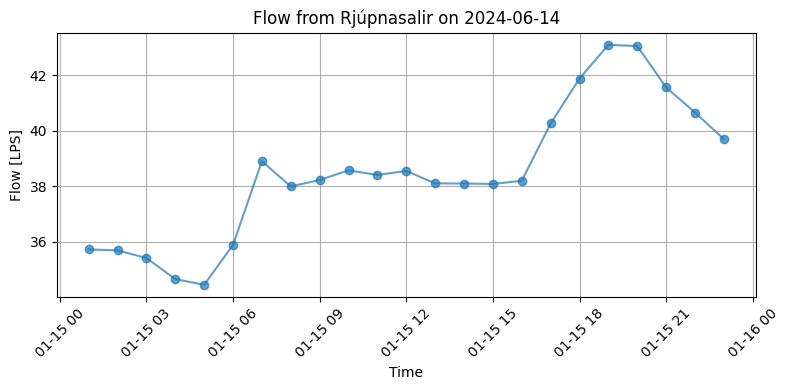


Relative Flow for 2024-01-15 (value / daily average ≈ 54.29 LPS):
01:00 — Flow: 71.44 LPS, Relative: 1.316
02:00 — Flow: 71.37 LPS, Relative: 1.315
03:00 — Flow: 70.82 LPS, Relative: 1.304
04:00 — Flow: 69.30 LPS, Relative: 1.276
05:00 — Flow: 68.89 LPS, Relative: 1.269
06:00 — Flow: 71.77 LPS, Relative: 1.322
07:00 — Flow: 77.80 LPS, Relative: 1.433
08:00 — Flow: 75.98 LPS, Relative: 1.399
09:00 — Flow: 76.45 LPS, Relative: 1.408
10:00 — Flow: 77.14 LPS, Relative: 1.421
11:00 — Flow: 76.81 LPS, Relative: 1.415
12:00 — Flow: 77.10 LPS, Relative: 1.420
13:00 — Flow: 76.20 LPS, Relative: 1.403
14:00 — Flow: 76.19 LPS, Relative: 1.403
15:00 — Flow: 76.16 LPS, Relative: 1.403
16:00 — Flow: 76.39 LPS, Relative: 1.407
17:00 — Flow: 80.52 LPS, Relative: 1.483
18:00 — Flow: 83.76 LPS, Relative: 1.543
19:00 — Flow: 86.19 LPS, Relative: 1.587
20:00 — Flow: 86.10 LPS, Relative: 1.586
21:00 — Flow: 83.12 LPS, Relative: 1.531
22:00 — Flow: 81.31 LPS, Relative: 1.498
23:00 — Flow: 79.39 LPS, Relati

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# --- Convert to datetime format ---
df_flow['start_time'] = pd.to_datetime(df_flow['start_time'], errors='coerce')

# --- Filter for 2024 ---
df_filtered_flow = df_flow[df_flow['start_time'].dt.year == 2024]

# --- Extract date column ---
df_filtered_flow['date'] = df_filtered_flow['start_time'].dt.date

yearly_avg = df_filtered_flow['value'].mean()

# --- Choose an arbitrary date ---
# chosen_date = pd.to_datetime("2024-01-15").date()
# chosen_date = pd.to_datetime("2024-10-10").date() # Góður vetrar dagur!
chosen_date = pd.to_datetime("2024-02-20").date()



day_data = df_filtered_flow[df_filtered_flow['date'] == chosen_date]

# --- Sort by time ---
day_data = day_data.sort_values(by='start_time')

# --- Compute daily average flow ---
daily_avg = day_data['value'].mean()

# --- Plot ---
plt.figure(figsize=(8, 4))
plt.plot(day_data['start_time'], day_data['value']/1, marker='o', linestyle='-', alpha=0.7)
plt.xlabel('Time')
plt.ylabel('Flow [LPS]')
plt.title(f'Flow from Rjúpnasalir on {chosen_date}')
# plt.title(f'Flow from Rjúpnasalir on 2024-06-14')

plt.grid(True)
plt.xticks(rotation=45)
# plt.ylim([20, 100])  # Adjust based on data range
plt.tight_layout()
plt.show()

# --- Print relative flow values ---
print(f"\nRelative Flow for {chosen_date} (value / daily average ≈ {yearly_avg:.2f} LPS):")
for t, v in zip(day_data['start_time'], day_data['value']):
    rel = v / yearly_avg
    print(f"{t.strftime('%H:%M')} — Flow: {v:.2f} LPS, Relative: {rel:.3f}")


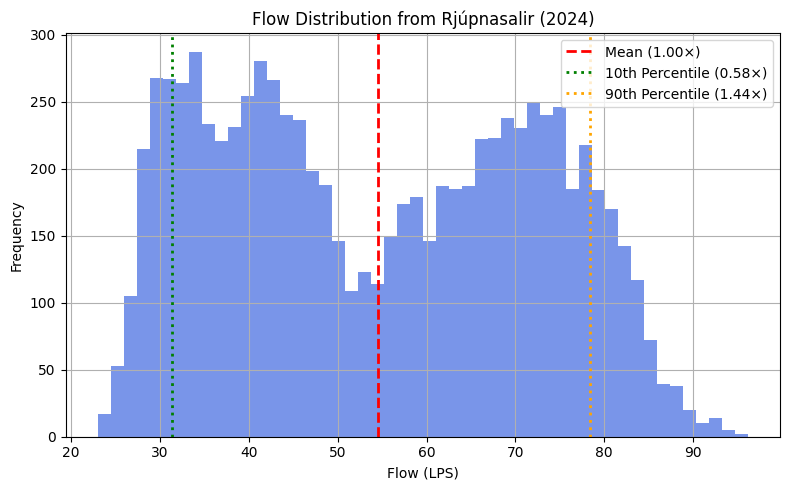

In [26]:
import matplotlib.pyplot as plt

# Convert 'start_time' to datetime format
df_flow['start_time'] = pd.to_datetime(df_flow['start_time'], errors='coerce')

# Filter data for the year 2024
df_filtered_flow = df_flow[df_flow['start_time'].dt.year == 2024]

# Drop all entries where 'value' < 20 (considered errors)
df_filtered_flow = df_filtered_flow[df_filtered_flow['value'] >= 20]

# Compute statistics
mean_val = df_filtered_flow['value'].mean()
p10 = df_filtered_flow['value'].quantile(0.10)
p90 = df_filtered_flow['value'].quantile(0.90)

# Normalize
p10_norm = p10 / mean_val
mean_norm = 1.0  # mean / mean
p90_norm = p90 / mean_val

# Plot histogram
plt.figure(figsize=(8, 5))
plt.hist(df_filtered_flow['value'], bins=50, color='royalblue', alpha=0.7)

# Add vertical lines for mean, 10th and 90th percentiles
plt.axvline(mean_val, color='red', linestyle='--', linewidth=2, label=f'Mean (1.00×)')
plt.axvline(p10, color='green', linestyle=':', linewidth=2, label=f'10th Percentile ({p10_norm:.2f}×)')
plt.axvline(p90, color='orange', linestyle=':', linewidth=2, label=f'90th Percentile ({p90_norm:.2f}×)')

# Labels and formatting
plt.xlabel('Flow (LPS)')
plt.ylabel('Frequency')
plt.title('Flow Distribution from Rjúpnasalir (2024)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


## Prentum specific dag

In [27]:
# Convert 'start_time' to datetime format
df_flow['start_time'] = pd.to_datetime(df_flow['start_time'], errors='coerce')

# Filter for a specific day (e.g., "2024-03-10")
specific_day = "2024-11-03"
df_specific_day = df_flow[df_flow['start_time'].dt.date == pd.to_datetime(specific_day).date()]

# Print the filtered data for that specific day
print(df_specific_day)


               start_time  value
23980 2024-11-03 04:00:00  55.86
23981 2024-11-03 02:00:00  56.55
23982 2024-11-03 07:00:00  55.98
23983 2024-11-03 06:00:00  55.08
23984 2024-11-03 05:00:00  55.47
23985 2024-11-03 01:00:00  57.07
24005 2024-11-03 22:00:00  51.82
24013 2024-11-03 21:00:00  54.18
24014 2024-11-03 23:00:00  49.35
24015 2024-11-03 20:00:00  56.41
24049 2024-11-03 03:00:00  55.77
24095 2024-11-03 19:00:00  58.44
24096 2024-11-03 18:00:00  58.48
24097 2024-11-03 17:00:00  56.93
24098 2024-11-03 16:00:00  55.92
24099 2024-11-03 11:00:00  59.36
24100 2024-11-03 08:00:00  56.13
24101 2024-11-03 10:00:00  59.15
24102 2024-11-03 09:00:00  57.63
24111 2024-11-03 15:00:00  55.24
24112 2024-11-03 14:00:00  56.57
24113 2024-11-03 12:00:00  58.96
24114 2024-11-03 13:00:00  57.73


In [28]:
df_specific_day.set_index('start_time', inplace=True)
df_specific_day = df_specific_day.sort_index(ascending=True)
avg_flow = df_specific_day['value'].mean()  # Sum of all flow for that day
df_specific_day['demand_pattern'] = df_specific_day['value'] / avg_flow  # Normalized demand pattern
df_specific_day

,value,demand_pattern
start_time,,
2024-11-03 01:00:00,57.07,1.014319
2024-11-03 02:00:00,56.55,1.005077
2024-11-03 03:00:00,55.77,0.991214
2024-11-03 04:00:00,55.86,0.992813
2024-11-03 05:00:00,55.47,0.985882
2024-11-03 06:00:00,55.08,0.978950
2024-11-03 07:00:00,55.98,0.994946
2024-11-03 08:00:00,56.13,0.997612
2024-11-03 09:00:00,57.63,1.024272


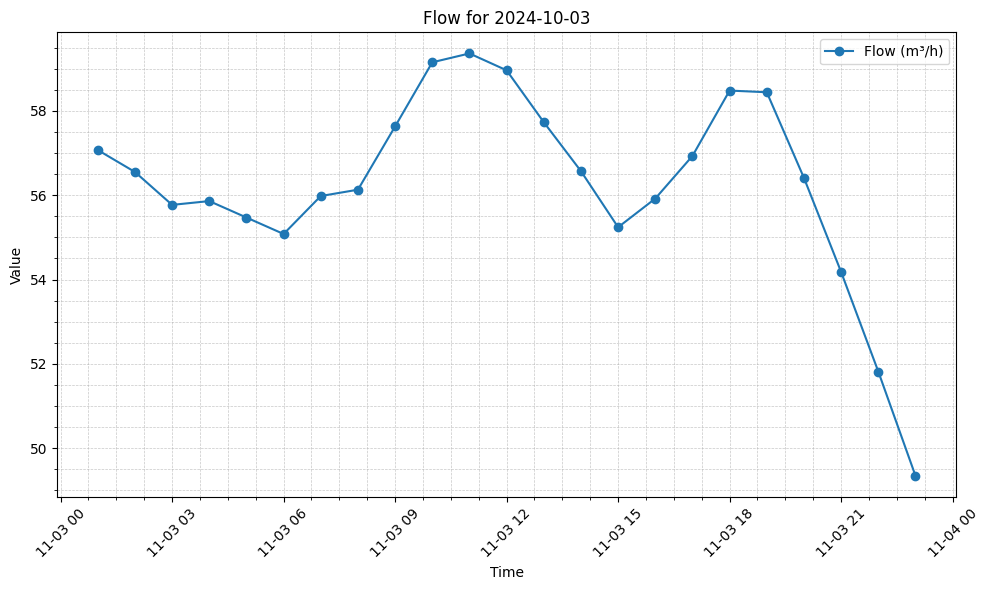

In [29]:
# Plot the value and demand_pattern columns from df_specific_day
plt.figure(figsize=(10, 6))

# Plot the flow value
plt.plot(df_specific_day.index, df_specific_day['value'], label='Flow (m³/h)', color='tab:blue', marker='o')

# Customize the plot
plt.xlabel('Time')
plt.ylabel('Value')
plt.title('Flow for 2024-10-03')
plt.xticks(rotation=45)

# Enable minor ticks for finer grid resolution
plt.minorticks_on()

# Apply finer grid resolution
plt.grid(which='both', linestyle='--', linewidth=0.5, alpha=0.7)

# Add a legend
plt.legend()

# Optimize layout
plt.tight_layout()

# Show the plot
plt.show()


In [30]:
# Convert 'start_time' to datetime format
df_pressure['start_time'] = pd.to_datetime(df_pressure['start_time'], errors='coerce')

# Filter for a specific day (e.g., "2024-03-10")
specific_day = "2024-11-03"
df_specific_day = df_pressure[df_pressure['start_time'].dt.date == pd.to_datetime(specific_day).date()]

# Print the filtered data for that specific day
print(df_specific_day)


               start_time  value
23981 2024-11-03 04:00:00   7.80
23982 2024-11-03 02:00:00   7.80
23983 2024-11-03 07:00:00   7.80
23984 2024-11-03 06:00:00   7.80
23985 2024-11-03 05:00:00   7.80
23986 2024-11-03 01:00:00   7.81
24006 2024-11-03 22:00:00   7.80
24014 2024-11-03 21:00:00   7.80
24015 2024-11-03 23:00:00   7.80
24016 2024-11-03 20:00:00   7.80
24050 2024-11-03 03:00:00   7.80
24095 2024-11-03 19:00:00   7.80
24096 2024-11-03 18:00:00   7.80
24097 2024-11-03 17:00:00   7.80
24098 2024-11-03 16:00:00   7.80
24099 2024-11-03 11:00:00   7.80
24100 2024-11-03 08:00:00   7.80
24101 2024-11-03 10:00:00   7.80
24102 2024-11-03 09:00:00   7.80
24111 2024-11-03 15:00:00   7.80
24112 2024-11-03 14:00:00   7.80
24113 2024-11-03 12:00:00   7.80
24114 2024-11-03 13:00:00   7.80


In [31]:
df_specific_day.set_index('start_time', inplace=True)
df_specific_day = df_specific_day.sort_index(ascending=True)
avg_press = df_specific_day['value'].mean()  # Sum of all flow for that day
df_specific_day['demand_pattern'] = df_specific_day['value'] / avg_press  # Normalized demand pattern
df_specific_day

,value,demand_pattern
start_time,,
2024-11-03 01:00:00,7.81,1.001226
2024-11-03 02:00:00,7.80,0.999944
2024-11-03 03:00:00,7.80,0.999944
2024-11-03 04:00:00,7.80,0.999944
2024-11-03 05:00:00,7.80,0.999944
2024-11-03 06:00:00,7.80,0.999944
2024-11-03 07:00:00,7.80,0.999944
2024-11-03 08:00:00,7.80,0.999944
2024-11-03 09:00:00,7.80,0.999944


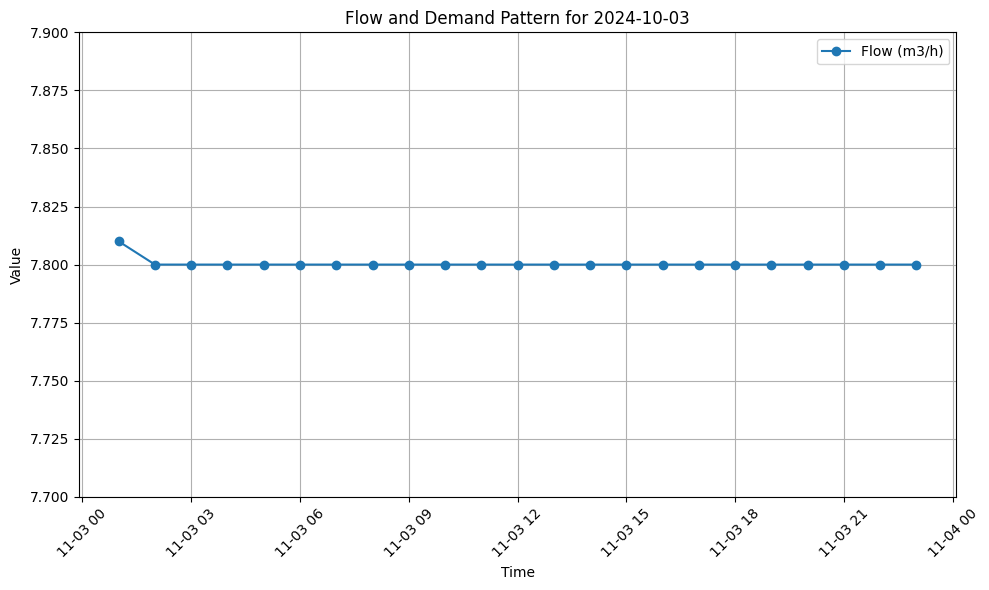

In [32]:
# Plot the value and demand_pattern columns from df_specific_day
plt.figure(figsize=(10, 6))

# Plot the flow value
plt.plot(df_specific_day.index, df_specific_day['value'], label='Flow (m3/h)', color='tab:blue', marker='o')

# Customize the plot
plt.xlabel('Time')
plt.ylabel('Value')
plt.title('Flow and Demand Pattern for 2024-10-03')
plt.xticks(rotation=45)
plt.grid(True)
plt.ylim([7.7 ,7.9])

# Add a legend
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()